# Data visualization

Echopype provides a way to quickly plot your data that has been converted with `open_raw`, or preprocessed as either `Sv` or `MVBS`. The visualize module in echopype will need the optional `plot` packages to be installed within your python environment. In order to do this, you need to specify `[plot]` during the installation of echopype.

```bash
pip install echopype[plot]
```

This installation includes [`matplotlib`](https://pypi.org/project/matplotlib/) and [`cmocean`](https://pypi.org/project/cmocean/) libraries for plotting and providing you with a custom `EK500` colormap along with all the wonderful colormap that `cmocean` provides.

```{figure} ./_static/ek500.png
:name: ek500

Comparison of `Jet` and `EK500` colormap. You can see the zooplankton within the echogram better with the `EK500`.
```

## The visualize module

To start utilizing the visualization module you can import the module by importing `echopype.visualize`.

```python
import echopype.visualize as epviz
```

The visualize module contains a single useful function called [`create_echogram`](api.html#module-echopype.visualize).

`create_echogram` can take both echodata or xarray dataset objects, and contains many other inputs to plot certain frequencies,
auto compute range, and add water level.

## Visualization demo

Below is an example of quick plotting for one of the OOI raw dataset used in the [Moored Echosounder Example notebook](https://osoceanacoustics.github.io/echopype-examples/ms_OOI_EK60_mooringtimeseries.html).

In [1]:
import matplotlib.pyplot as plt

import echopype.visualize as epviz
import echopype as ep

raw_url ="https://rawdata.oceanobservatories.org/files/CE04OSPS/PC01B/ZPLSCB102_10.33.10.143/2017/08/21/OOI-D20170821-T163049.raw"
echodata = ep.open_raw(raw_file=raw_url, sonar_model="EK60")

09:43:28  parsing file OOI-D20170821-T163049.raw, time of first ping: 2017-Aug-21 16:30:49


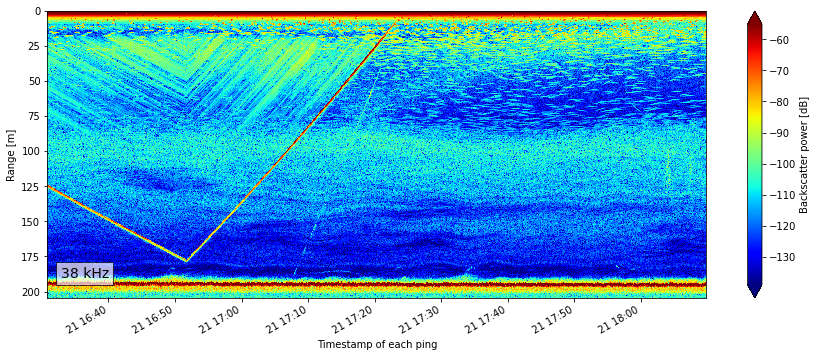

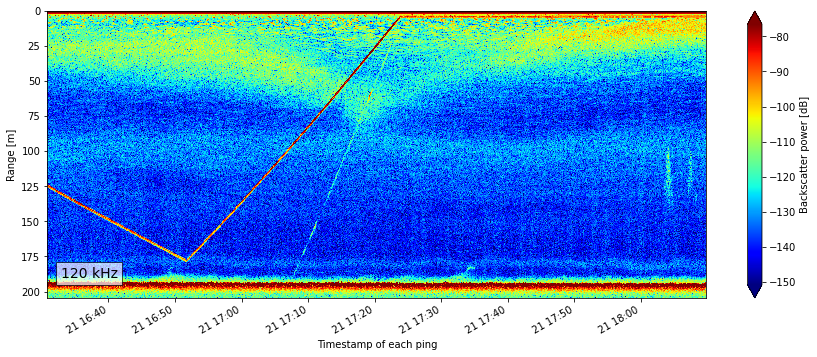

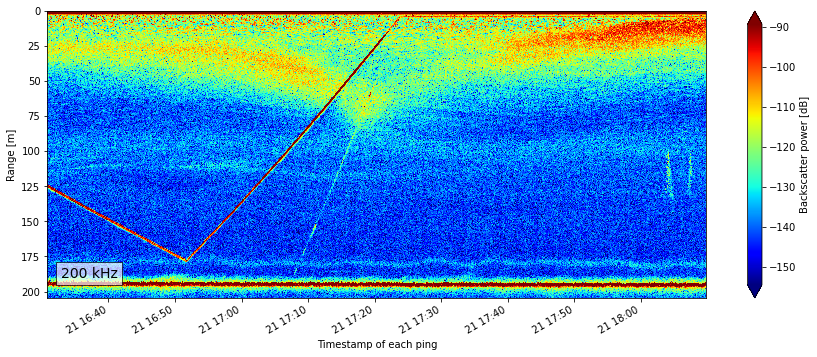

In [2]:
# Quickly look at all of the frequency,
# calculate range on the fly,
# and color the data based on the actual data range available.
epviz.create_echogram(echodata, get_range=True, robust=True)

From a quick look at the plot we can quickly tell that this is upside down, and therefore the data need to be flipped since this is coming from an echosounder that is upside down on a platform around 200m depth. For the purpose of this demo, we are not going to do that flipping. See the [Moored Echosounder Example notebook](https://osoceanacoustics.github.io/echopype-examples/ms_OOI_EK60_mooringtimeseries.html) for more detail on this dataset.